In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset



import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
nlp = spacy.load("en_core_web_md") 

In [2]:
# nlp = spacy.load("en_core_web_md")

df_true = pd.read_csv(r"C:\Users\Acer\Jupyter sample code python\fakevsreal\True.csv")
df_true["Label"] = 1
df_fake =  pd.read_csv(r"C:\Users\Acer\Jupyter sample code python\fakevsreal\Fake.csv")
df_fake["Label"] = 0
df_all = pd.concat([df_true, df_fake], axis=0)

df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all

# X = df_all.iloc[:10000]["title"] + " " + df_all.iloc[1000]["text"]
X = df_all["title"] + " " + df_all["text"]
# X = df_all["title"] + " " + df_all["text"]
# y = df_all.iloc.Label
y = df_all.Label

In [3]:
X

0        WHEN HUMA MET HILLARY: “Oh my God, she’s so be...
1         Did Hillary Clinton Seriously Criticize Berni...
2        Hariri indicates possibility of revoking his r...
3        COMEDY GOLD! WATCH HILLARY Give Unbelievable R...
4        Trump adds Washington lawyer John Dowd to his ...
                               ...                        
44893    Democrats ask judge to sanction Republicans ov...
44894     White House Staffer On Kushner FBI Investigat...
44895    U.S. hopes for 'good deliverables' during Trum...
44896    Dyer: ‘LA Times ‘Fake News’ Article is an Atta...
44897    Illinois lawmaker's daughter charged in politi...
Length: 44898, dtype: object

In [4]:
y

0        0
1        0
2        1
3        0
4        1
        ..
44893    1
44894    0
44895    1
44896    0
44897    1
Name: Label, Length: 44898, dtype: int64

In [4]:
len(X)

44898

In [5]:
len(y)

44898

In [29]:
df_true

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [33]:
X[0]

'Cyclone batters southwestern India coast killing 14, many missing MUMBAI (Reuters) - Cyclone Ockhi barrelled into the Lakshwadeep islands in southwestern India on Saturday after drenching the neighboring states of Kerala and Tamil Nadu, claiming so far around 14 lives with many fishermen still feared trapped at sea.  Authorities including the National Disaster Management Authority (NDMA), India s Coast Guard and Navy have rescued about 223 fishermen and evacuated thousands of people from cyclone hit areas, officials said, as they continued their operations on Saturday. Prime Minister Narendra Modi has spoken to the chief minister of Tamil Nadu, assuring him of support operations including necessary funds, according to local media. Ockhi is expected to travel north towards Mumbai and Gujarat in the next 48 hours, according to Indian Meteorological Department (IMD) Director S. Sudevan in Trivandrum, though it is likely to lose intensity.  The intensity of the wind may come down and the 

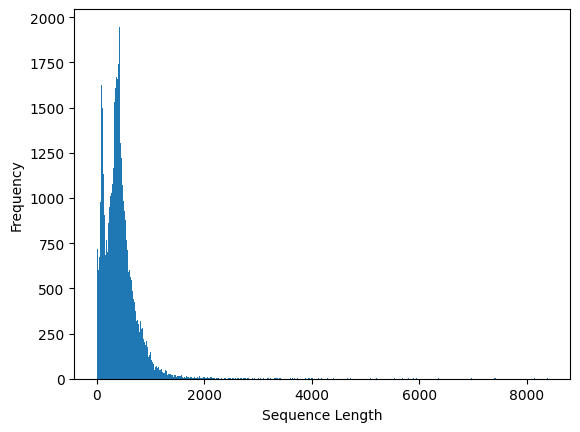

In [4]:
import matplotlib.pyplot as plt
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

sequences = tokenizer.texts_to_sequences(X)
sequence_lengths = [len(seq) for seq in sequences]


plt.hist(sequence_lengths, bins='auto')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [6]:



tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index


vocab_size = len(word_index) + 1
vector_dim = nlp.vocab.vectors_length

embedding_matrix = np.zeros((vocab_size, vector_dim))

for word, i in word_index.items():
    token = nlp.vocab[word]
    embedding_matrix[i] = token.vector


embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float), freeze=True)


X_sequences = tokenizer.texts_to_sequences(X)


max_len = 500
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_train, X_val, y_train, y_val = train_test_split(X_padded, np.array(y), test_size=0.3)


In [16]:
len(embedding_matrix[0])

300

In [15]:
X_padded[2]

array([  894,   903,  4359,     3, 93313,    57,   141,  2580,   656,
         107,    69,    33,     8,    79,   741,   149,   256,   894,
         903,     9,   214,  1932,    66,    37,    22, 15191, 23492,
          57,     1,   259, 11881,   141,    11,   545,   363,  1694,
         983,     5,    11,  2447,     6,     1,   890,   395,    33,
           8,   149,    96,  2053,    15,    11,   141,     5,    31,
          28,  6011,     6,    75,   611,    35,    77,  7057,    42,
         202,   784,     5,     1,    87,    76,    74,    39,  1242,
          66,    28,   886,  2131,    46,     1,  2635,   431,     5,
          70,   167,   598,  3525,    13,     6,     4,   185, 10497,
         544,   270,    18,     1,   259,    11,  1569,     1,   705,
           3,  2326,   158,   103,   656,    14,   891,  3638,    50,
          12,    89,   393,     7,  1102, 21154, 93314,     2,   172,
         141,  2580,   209,     2,   240,    78,     0,     0,     0,
           0,     0,

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [16]:

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.long), torch.tensor(y_val, dtype=torch.float))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [17]:
vector_dim = nlp.vocab.vectors_length

In [21]:
vector_dim

300

In [9]:
import copy

In [18]:
class NewsClassifier(nn.Module):
    def __init__(self, embedding_layer, vector_dim):
        super(NewsClassifier, self).__init__()
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(vector_dim, 64, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(128, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1]
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsClassifier(embedding_layer, vector_dim).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 20

best_loss = float('inf')
best_model = None
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        preds = (outputs >= 0.5).float()
        acc = (preds == labels).float().mean()
        train_acc += acc.item()

    val_loss = 0
    val_acc = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = (outputs >= 0.5).float()
            acc = (preds == labels).float().mean()
            val_acc += acc.item()
    
    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    avg_train_acc = train_acc / len(train_loader)
    avg_val_acc = val_acc / len(val_loader)

    if avg_train_loss + avg_val_loss < best_loss:
        best_loss = avg_train_loss + avg_val_loss
        best_model = copy.deepcopy(model)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train loss: {avg_train_loss:.4f}")
    print(f"Validation loss: {avg_val_loss:.4f}")
    print(f"Train accuracy: {avg_train_acc:.4f}")
    print(f"Validation accuracy: {avg_val_acc:.4f}")


Epoch 1/20
Train loss: 0.5610
Validation loss: 0.2751
Train accuracy: 0.6630
Validation accuracy: 0.9027
Epoch 2/20
Train loss: 0.2286
Validation loss: 0.1894
Train accuracy: 0.9271
Validation accuracy: 0.9465
Epoch 3/20
Train loss: 0.1764
Validation loss: 0.1604
Train accuracy: 0.9513
Validation accuracy: 0.9574
Epoch 4/20
Train loss: 0.1541
Validation loss: 0.1384
Train accuracy: 0.9594
Validation accuracy: 0.9645
Epoch 5/20
Train loss: 0.3131
Validation loss: 0.2044
Train accuracy: 0.8806
Validation accuracy: 0.9375
Epoch 6/20
Train loss: 0.1701
Validation loss: 0.1584
Train accuracy: 0.9547
Validation accuracy: 0.9566
Epoch 7/20
Train loss: 0.1457
Validation loss: 0.1464
Train accuracy: 0.9623
Validation accuracy: 0.9611
Epoch 8/20
Train loss: 0.1360
Validation loss: 0.1390
Train accuracy: 0.9661
Validation accuracy: 0.9633
Epoch 9/20
Train loss: 0.1871
Validation loss: 0.1958
Train accuracy: 0.9389
Validation accuracy: 0.9355
Epoch 10/20
Train loss: 0.1534
Validation loss: 0.1483


In [19]:
torch.save(best_model.state_dict(), r"C:\Users\Acer\Jupyter sample code python\fakevsreal\best_model1.pth")

In [7]:
class NewsClassifier(nn.Module):
    def __init__(self, embedding_layer, vector_dim):
        super(NewsClassifier, self).__init__()
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(vector_dim, 64, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(128, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1]
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsClassifier(embedding_layer, vector_dim).to(device)

In [8]:
model_path = r"C:\Users\Acer\Jupyter sample code python\fakevsreal\best_model1.pth"
saved_model = NewsClassifier(embedding_layer, vector_dim).to(device)
saved_model.load_state_dict(torch.load(model_path))
saved_model.eval()
saved_model.to(device)

NewsClassifier(
  (embedding): Embedding(147709, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=128, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, np.array(y), test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33)

In [10]:
def predict_single_instance(model, x):
    model.eval()
    with torch.no_grad():
        x = torch.tensor(x, dtype=torch.long).unsqueeze(0).to(next(model.parameters()).device)
        output = model(x).squeeze()
        prediction = (output >= 0.5).float().item()
    return prediction



def sequence_to_text(sequence):
    index_to_word = {v: k for k, v in tokenizer.word_index.items()}
    text = " ".join([index_to_word.get(idx, "") for idx in sequence if idx != 0])
    return text

X_text = df_all["title"] + " " + df_all["text"]
y_text = df_all.Label

X_train_text, X_temp_text, y_train_text, y_temp_text = train_test_split(X_text, np.array(y_text), test_size=0.3)
X_val_text, X_test_text, y_val_text, y_test_text = train_test_split(X_temp_text, y_temp_text, test_size=0.33)



In [17]:
instance_index = 9  
x_instance = X_test[instance_index]
prediction = predict_single_instance(saved_model, x_instance)
true_label = y_test[instance_index]

test_index = X_test_text.index[instance_index]
original_text = df_all.loc[test_index, "title"] + " " + df_all.loc[test_index, "text"]

print(f"Text for instance {instance_index}:")
print(original_text)
print("\nPrediction:")
print("Real news" if prediction == 1.0 else "Fake news")
print("\nTrue label:")
print("Real news" if true_label == 1 else "Fake news")


Text for instance 9:
 George Zimmerman Launches Despicable Attack On Trayvon Martin’s Parents In the wake of his failed efforts to sell the gun he used to murder Trayvon Martin, racist George Zimmerman talked to the Daily Beast and said some pretty horrendous things about the slain teen s parents. They didn t raise their son right,  Zimmerman said.  He attacked a complete stranger and attempted to kill him. Zimmerman pursued and initiated an encounter with the unarmed 17-year-old on February 26, 2012 as Martin was crossing through the gated Sanford, Florida community on his way home to his father s house.Despite being told not to pursue Martin, Zimmerman wanted to play cop and did so anyway despite having no reason to do so. He shot and killed Martin with a Kel-Tec PF-9 9mm semi-automatic pistol and claimed self defense and got away with the murder because of Florida s controversial Stand Your Ground law.Zimmerman has been in and out of trouble with the law ever since, and has avoided 